# 3. 线性神经网络

在介绍深度神经网络之前，我们需要了解神经网络训练的基础知识。 本章我们将介绍神经网络的整个训练过程， 包括：定义简单的神经网络架构、数据处理、指定损失函数和如何训练模型。 为了更容易学习，我们将从经典算法————线性神经网络开始，介绍神经网络的基础知识。 经典统计学习技术中的线性回归和softmax回归可以视为线性神经网络， 这些知识将为本书其他部分中更复杂的技术奠定基础。
## 3.1. 线性回归

回归（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。 但不是所有的预测都是回归问题。 在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。

### 3.1.1 线性回归的基本元素

![image_Snipaste_2023-12-14_15-25-04.png](./assets/Snipaste_2023-12-14_15-25-04.png)

### 3.1.1.1 线性模型
![image_Snipaste_2023-12-14_15-29-11.png](./assets/Snipaste_2023-12-14_15-29-11.png)

![image_Snipaste_2023-12-14_15-37-52.png](./assets/Snipaste_2023-12-14_15-37-52.png)

### 3.1.1.2. 损失函数

![image_Snipaste_2023-12-14_15-40-40.png](./assets/Snipaste_2023-12-14_15-40-40.png)

![image_Snipaste_2023-12-14_15-43-26.png](./assets/Snipaste_2023-12-14_15-43-26.png)


### 3.1.1.3. 解析解
![image_Snipaste_2023-12-14_15-59-59.png](./assets/Snipaste_2023-12-14_15-59-59.png)


### 3.1.1.4. 随机梯度下降
即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。 在许多任务上，那些难以优化的模型效果要更好。 因此，弄清楚如何训练这些难以优化的模型是非常重要的。

本书中我们用到一种名为梯度下降（gradient descent）的方法， 这种方法几乎可以优化所有深度学习模型。 它通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值） 关于模型参数的导数（在这里也可以称为梯度）。 但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。 因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本， 这种变体叫做小批量随机梯度下降（minibatch stochastic gradient descent）。
![image_Snipaste_2023-12-14_16-07-07.png](./assets/Snipaste_2023-12-14_16-07-07.png)
![image_Snipaste_2023-12-14_16-11-41.png](./assets/Snipaste_2023-12-14_16-11-41.png)


### 3.1.1.5. 用模型进行预测
![image_Snipaste_2023-12-14_16-12-09.png](./assets/Snipaste_2023-12-14_16-12-09.png)

###  3.1.2 矢量化加速
在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。



In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。 我们实例化两个全为1的10000维向量。 在一种方法中，我们将使用Python的for循环遍历向量； 在另一种方法中，我们将依赖对+的调用。

In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

由于在本书中我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [3]:
class Timer:  #@save
    """记录多次运行时间"""

    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

现在我们可以对工作负载进行基准测试。

首先，我们使用for循环，每次执行一位的加法。

In [6]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
print(c)
f'{timer.stop():.5f} sec'

tensor([2., 2., 2.,  ..., 2., 2., 2.])


'0.06962 sec'

或者，我们使用重载的+运算符来计算按元素的和。

In [7]:
timer.start()
d = a + b
print(d)
f'{timer.stop():.5f} sec'

tensor([2., 2., 2.,  ..., 2., 2., 2.])


'0.00162 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

### 3.1.3. 正态分布与平方损失

![image_Snipaste_2023-12-14_16-20-56.png](./assets/Snipaste_2023-12-14_16-20-56.png)



In [9]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma ** 2 * (x - mu) ** 2)

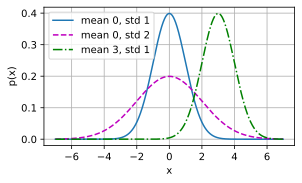

In [10]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

![image_Snipaste_2023-12-14_16-29-49.png](./assets/Snipaste_2023-12-14_16-29-49.png)

### 3.1.4 从线性回归到深度网络

到目前为止，我们只谈论了线性模型。 尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型， 从而把线性模型看作一个神经网络。 首先，我们用“层”符号来重写这个模型。

### 3.1.4.1. 神经网络图

深度学习从业者喜欢绘制图表来可视化模型中正在发生的事情。 在 图3.1.2中，我们将线性回归模型描述为一个神经网络。 需要注意的是，该图只显示连接模式，即只显示每个输入如何连接到输出，隐去了权重和偏置的值。
![image_Snipaste_2023-12-14_16-37-28.png](./assets/Snipaste_2023-12-14_16-37-28.png)

![image_Snipaste_2023-12-14_16-38-32.png](./assets/Snipaste_2023-12-14_16-38-32.png)


### 3.1.4.2. 生物学
线性回归发明的时间（1795年）早于计算神经科学，所以将线性回归描述为神经网络似乎不合适。 当控制学家、神经生物学家沃伦·麦库洛奇和沃尔特·皮茨开始开发人工神经元模型时， 他们为什么将线性模型作为一个起点呢？ 我们来看一张图片 图3.1.3： 这是一张由树突（dendrites，输入终端）、 细胞核（nucleus，CPU）组成的生物神经元图片。 轴突（axon，输出线）和轴突端子（axon terminal，输出端子） 通过突触（synapse）与其他神经元连接。

![image_Snipaste_2023-12-14_16-41-02.png](./assets/Snipaste_2023-12-14_16-41-02.png)
![image_Snipaste_2023-12-14_16-41-26.png](./assets/Snipaste_2023-12-14_16-41-26.png)


### 3.1.5. 小结
1. 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。
2. 矢量化使数学表达上更简洁，同时运行的更快。
3. 最小化目标函数和执行极大似然估计等价。
4. 线性回归模型也是一个简单的神经网络。
